# Лабораторная работа №4
-----------------------
**Ассоциативный анализ**

----------------------- 

## Цель:
Ознакомиться с ассоциативного анализа из библиотеки MLxtend

## Выполнение

### imports

In [214]:
import pandas as pd
import numpy as np
import networkx as nx

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, fpmax, association_rules

import matplotlib as mpl
import matplotlib.pyplot as plt
from itertools import chain

### Загрузка данных

In [46]:
all_data = pd.read_csv('groceries - groceries.csv')
all_data


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Очистка данных от значений NaN

In [47]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]
np_data

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

Выделить уникальные товары

In [48]:
unique_items = np.array(list(set(list(chain.from_iterable(np_data)))))
print(unique_items)
print(len(unique_items))

['soft cheese' 'curd cheese' 'cooking chocolate' 'roll products'
 'UHT-milk' 'white bread' 'detergent' 'male cosmetics' 'nut snack'
 'house keeping products' 'domestic eggs' 'organic sausage' 'yogurt'
 'liqueur' 'Instant food products' 'dessert' 'candy' 'cat food' 'soda'
 'popcorn' 'newspapers' 'seasonal products' 'red/blush wine'
 'sparkling wine' 'nuts/prunes' 'sound storage medium'
 'female sanitary products' 'syrup' 'organic products' 'whisky'
 'long life bakery product' 'brandy' 'toilet cleaner'
 'fruit/vegetable juice' 'beef' 'waffles' 'flower soil/fertilizer'
 'whole milk' 'meat spreads' 'skin care' 'jam' 'semi-finished bread'
 'rubbing alcohol' 'potato products' 'canned beer' 'baby cosmetics'
 'light bulbs' 'berries' 'cocoa drinks' 'ketchup' 'processed cheese'
 'beverages' 'pasta' 'frozen fish' 'chewing gum' 'pickled vegetables'
 'prosecco' 'whipped/sour cream' 'turkey' 'pip fruit' 'sausage'
 'snack products' 'pet care' 'butter' 'flour' 'kitchen utensil'
 'baking powder' 'hard 

### FPGrowth и FPMax

Преобразование данных для анализа

In [49]:
te = TransactionEncoder()
te_ary = te.fit_transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Ассоциативный анализ алгоритмом FPGrowth

In [50]:
fpg_result = fpgrowth(data, min_support=0.03, use_colnames = True)
fpg_result

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
...,...,...
58,0.033249,"(whole milk, pastry)"
59,0.047382,"(other vegetables, root vegetables)"
60,0.048907,"(whole milk, root vegetables)"
61,0.030605,"(sausage, rolls/buns)"


Минимальное и максимальное значение уровня поддержки для компонентов различной длины

In [51]:
def min_max_support(result):
    support_stats = {}
    for _, [support, itemsets] in result.iterrows():
        set_size = len(itemsets)
        if set_size in support_stats:
            support_stats[set_size]["min"] = min(support, support_stats[set_size]["min"])
            support_stats[set_size]["max"] = max(support, support_stats[set_size]["max"])
        else:
            support_stats[set_size] = {"min": support, "max": support}
    return support_stats


In [52]:
pd.DataFrame(min_max_support(fpg_result)).T

,min,max
1,0.030402,0.255516
2,0.030097,0.074835


Ассоциативный анализ алгоритмом FPMax

In [53]:
fpm_result = fpmax(data, min_support=0.03, use_colnames = True).sort_values('support', ascending=False)
fpm_result

,support,itemsets
35,0.098526,(shopping bags)
31,0.080529,(bottled beer)
30,0.079817,(newspapers)
29,0.077682,(canned beer)
49,0.074835,"(whole milk, other vegetables)"
27,0.072293,(fruit/vegetable juice)
25,0.064870,(brown bread)
24,0.063447,(domestic eggs)
23,0.058973,(frankfurter)
22,0.058566,(margarine)


In [54]:
pd.DataFrame(min_max_support(fpm_result)).T

,min,max
1,0.030402,0.098526
2,0.030097,0.074835


Гистограмма исходных данных и результатов алгоритмов FPGrowth и FPMax

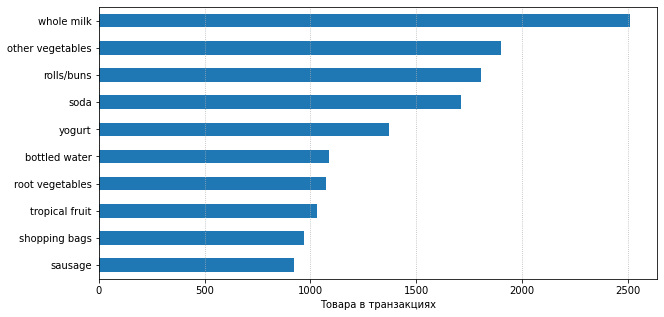

In [55]:
plt.figure(figsize=(10, 5))
plt.xlabel("Товара в транзакциях")
data.sum().nlargest(10).sort_values().plot.barh()
plt.grid(True, axis="x", linestyle="dotted")
plt.show()

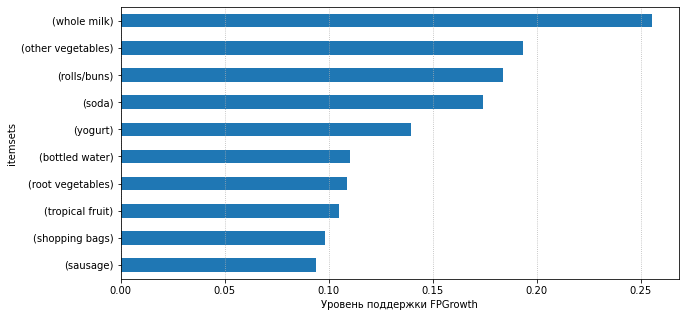

In [56]:
plt.figure(figsize=(10, 5))
plt.xlabel('Уровень поддержки FPGrowth')
fpg_result.set_index('itemsets')['support'].nlargest(10).sort_values().plot.barh()
plt.grid(True, axis="x", linestyle="dotted")
plt.show()

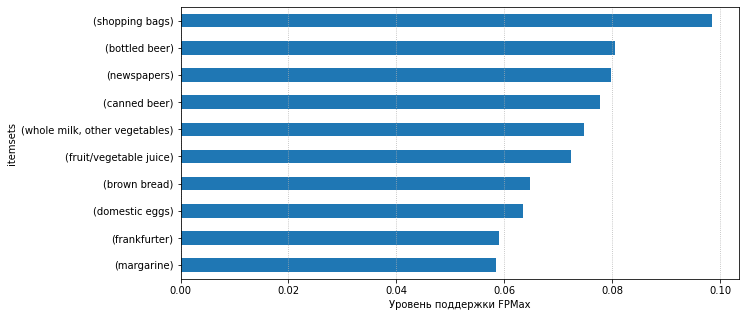

In [57]:
plt.figure(figsize=(10, 5))
plt.xlabel('Уровень поддержки FPMax')
fpm_result.set_index('itemsets')['support'].nlargest(10).sort_values().plot.barh()
plt.grid(True, axis="x", linestyle="dotted")
plt.show()

Ввод ограничений на товары

In [58]:
items = [
    'whole milk', 'yogurt', 'soda', 'tropical fruit',
    'shopping bags', 'sausage','whipped/sour cream',
    'rolls/buns', 'other vegetables', 'root vegetables',
    'pork', 'bottled water', 'pastry', 'citrus fruit',
    'canned beer','bottled beer'
]

np_data_new = all_data.to_numpy()
np_data_new = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data]

te_new = TransactionEncoder()
te_ary_new = te_new.fit_transform(np_data_new)
data_new = pd.DataFrame(te_ary_new, columns=te_new.columns_)
data_new


,bottled beer,bottled water,canned beer,citrus fruit,other vegetables,pastry,pork,rolls/buns,root vegetables,sausage,shopping bags,soda,tropical fruit,whipped/sour cream,whole milk,yogurt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,True,False,False,False,False,True,False,False,False,False,True,True,False
9831,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True
9833,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


Результат работы FPGrowth

In [59]:
fpg_result_new = fpgrowth(data_new, min_support=0.03, use_colnames = True).sort_values('support', ascending=False)
fpg_result_new

,support,itemsets
1,0.182613,(whole milk)
2,0.149771,(rolls/buns)
4,0.146721,(other vegetables)
7,0.144484,(soda)
0,0.116624,(yogurt)
11,0.093645,(shopping bags)
5,0.093238,(bottled water)
9,0.079715,(root vegetables)
8,0.075547,(pastry)
12,0.063854,(whipped/sour cream)


Результат работы FPMax

In [60]:
fpm_result_new = fpmax(data_new, min_support=0.03, use_colnames = True).sort_values('support', ascending=False)
fpm_result_new

,support,itemsets
9,0.093645,(shopping bags)
8,0.093238,(bottled water)
5,0.075547,(pastry)
4,0.063854,(whipped/sour cream)
3,0.062430,(bottled beer)
15,0.060702,"(whole milk, other vegetables)"
2,0.055923,(tropical fruit)
11,0.047077,"(whole milk, yogurt)"
1,0.046162,(canned beer)
16,0.045755,"(whole milk, rolls/buns)"


Минимальный и максимальный уровень поддержки FPGrowth и FPMax на ограниченном наборе данных

In [61]:
pd.DataFrame(min_max_support(fpg_result_new)).T

,min,max
1,0.036706,0.182613
2,0.030707,0.060702


In [62]:
pd.DataFrame(min_max_support(fpm_result_new)).T

,min,max
1,0.036706,0.093645
2,0.030707,0.060702


Гистограмма исходных данных и результатов алгоритмов FPGrowth и FPMax для ограниченного набора данных

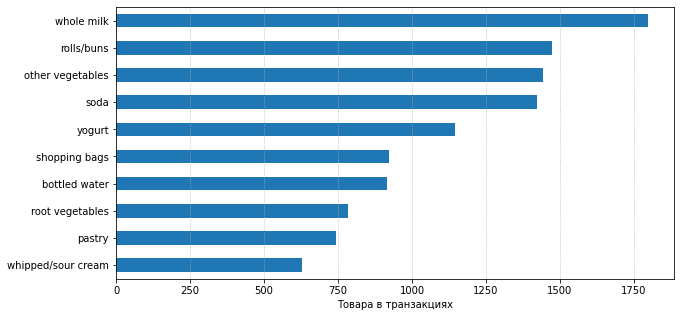

In [63]:
plt.figure(figsize=(10, 5))
plt.xlabel("Товара в транзакциях")
data_new.sum().nlargest(10).sort_values().plot.barh()
plt.grid(True, axis="x", linestyle="dotted")
plt.show()

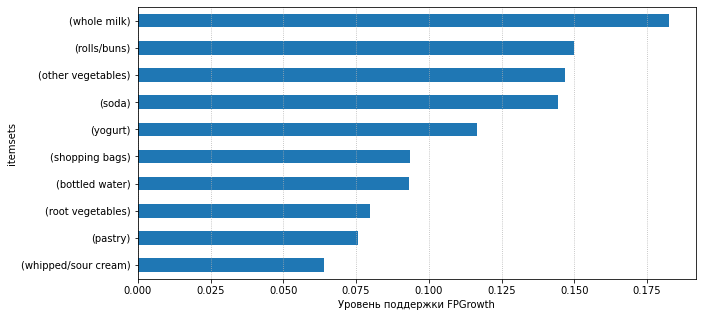

In [64]:
plt.figure(figsize=(10, 5))
plt.xlabel('Уровень поддержки FPGrowth')
fpg_result_new.set_index('itemsets')['support'].nlargest(10).sort_values().plot.barh()
plt.grid(True, axis="x", linestyle="dotted")
plt.show()

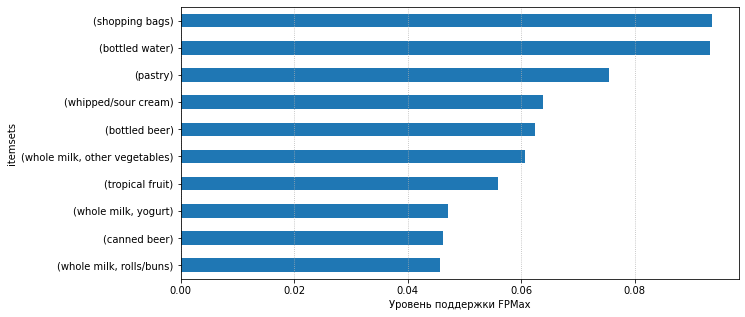

length
1    31
2    19
Name: itemsets, dtype: int64

In [65]:
plt.figure(figsize=(10, 5))
plt.xlabel('Уровень поддержки FPMax')
fpm_result_new.set_index('itemsets')['support'].nlargest(10).sort_values().plot.barh()
plt.grid(True, axis="x", linestyle="dotted")
plt.show()

fpm_result['length'] = fpm_result['itemsets'].apply(lambda x: len(x))
grouped_count = fpm_result.groupby('length').itemsets.count()
grouped_count


Постройте график изменения количества получаемых правил от уровня поддержки

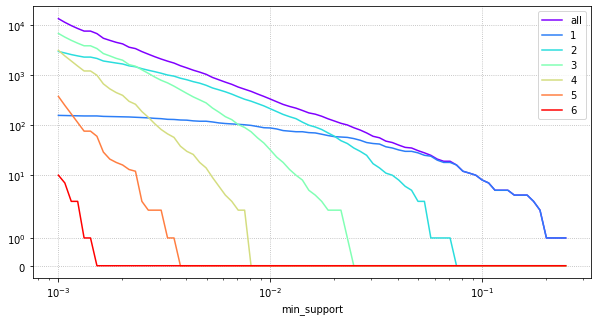

In [66]:
min_supports = np.logspace(-3, 0, 100)

lengths_frame = []
for min_support in min_supports:
    results = fpgrowth(data, min_support=min_support, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    max_len_curr = np.max(results['length'])
    if (np.isnan(max_len_curr)):
        break
    grouped_count = results.groupby('length').itemsets.count()

    lengths_row = {
        'min_support': min_support,
        'all': len(results)
    }
    for index, count in grouped_count.iteritems():
        lengths_row[index] = count
    lengths_frame.append(lengths_row)

lengths_frame = pd.DataFrame(lengths_frame).fillna(value=0)
_, axs = plt.subplots(figsize=(10, 5))
lengths_frame.plot(ax=axs, x='min_support', logy='sym', logx=True, colormap='rainbow')
axs.grid(True, axis="both", linestyle="dotted")
plt.show()

### Ассоциативные правила

Выборка данных, в которой более одного товара в одной транзакции

In [67]:
np_data_tge2 = all_data.to_numpy()
np_data_tge2 = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data_tge2]
np_data_tge2 = [row for row in np_data_tge2 if len(row) > 1]

te_tge2 = TransactionEncoder()
te_ary_tge2 = te_tge2.fit_transform(np_data_tge2)
data_tge2 = pd.DataFrame(te_ary_tge2, columns=te_tge2.columns_)
data_tge2

,bottled beer,bottled water,canned beer,citrus fruit,other vegetables,pastry,pork,rolls/buns,root vegetables,sausage,shopping bags,soda,tropical fruit,whipped/sour cream,whole milk,yogurt
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False
4962,False,False,False,True,False,False,False,False,True,True,False,False,False,True,True,False
4963,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True
4964,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


Частоты наборов 

In [68]:
result_tge2 = fpgrowth(data_tge2, min_support=0.05, use_colnames = True)
result_tge2

,support,itemsets
0,0.241240,(yogurt)
1,0.185864,(tropical fruit)
2,0.421869,(whole milk)
3,0.335079,(other vegetables)
4,0.296214,(rolls/buns)
5,0.113371,(bottled beer)
6,0.185461,(bottled water)
7,0.146395,(citrus fruit)
8,0.267217,(soda)
9,0.196335,(root vegetables)


Ассоциативный анализ

In [69]:
rules_def = association_rules(result_tge2, min_threshold = 0.3)
rules_def

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
2,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
3,(tropical fruit),(other vegetables),0.185864,0.335079,0.071083,0.382449,1.141370,0.008804,1.076706
4,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
5,(whole milk),(other vegetables),0.421869,0.335079,0.148208,0.351313,1.048449,0.006849,1.025026
6,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
7,(rolls/buns),(whole milk),0.296214,0.421869,0.112163,0.378654,0.897564,-0.012801,0.930450
8,(bottled water),(whole milk),0.185461,0.421869,0.068063,0.366992,0.869921,-0.010177,0.913309
9,(bottled water),(soda),0.185461,0.267217,0.057390,0.309446,1.158033,0.007832,1.061153


In [70]:
rules_sup = association_rules(result_tge2, metric='support', min_threshold=0.01)
rules_sup

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.421869,0.241240,0.110954,0.263007,1.090228,0.009183,1.029535
1,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
2,(soda),(yogurt),0.267217,0.241240,0.054168,0.202713,0.840294,-0.010295,0.951677
3,(yogurt),(soda),0.241240,0.267217,0.054168,0.224541,0.840294,-0.010295,0.944967
4,(yogurt),(rolls/buns),0.241240,0.296214,0.068063,0.282137,0.952476,-0.003396,0.980390
5,(rolls/buns),(yogurt),0.296214,0.241240,0.068063,0.229776,0.952476,-0.003396,0.985115
6,(other vegetables),(yogurt),0.335079,0.241240,0.085985,0.256611,1.063713,0.005150,1.020676
7,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
8,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
9,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797


In [71]:
rules_cnf = association_rules(result_tge2, metric='confidence', min_threshold=0.01)
rules_cnf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.421869,0.241240,0.110954,0.263007,1.090228,0.009183,1.029535
1,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
2,(soda),(yogurt),0.267217,0.241240,0.054168,0.202713,0.840294,-0.010295,0.951677
3,(yogurt),(soda),0.241240,0.267217,0.054168,0.224541,0.840294,-0.010295,0.944967
4,(yogurt),(rolls/buns),0.241240,0.296214,0.068063,0.282137,0.952476,-0.003396,0.980390
5,(rolls/buns),(yogurt),0.296214,0.241240,0.068063,0.229776,0.952476,-0.003396,0.985115
6,(other vegetables),(yogurt),0.335079,0.241240,0.085985,0.256611,1.063713,0.005150,1.020676
7,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
8,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
9,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797


In [72]:
rules_lft = association_rules(result_tge2, metric='lift', min_threshold=0.01)
rules_lft

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.421869,0.241240,0.110954,0.263007,1.090228,0.009183,1.029535
1,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
2,(soda),(yogurt),0.267217,0.241240,0.054168,0.202713,0.840294,-0.010295,0.951677
3,(yogurt),(soda),0.241240,0.267217,0.054168,0.224541,0.840294,-0.010295,0.944967
4,(yogurt),(rolls/buns),0.241240,0.296214,0.068063,0.282137,0.952476,-0.003396,0.980390
5,(rolls/buns),(yogurt),0.296214,0.241240,0.068063,0.229776,0.952476,-0.003396,0.985115
6,(other vegetables),(yogurt),0.335079,0.241240,0.085985,0.256611,1.063713,0.005150,1.020676
7,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
8,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
9,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797


In [73]:
rules_lvr = association_rules(result_tge2, metric='leverage', min_threshold=0.01)
rules_lvr

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
1,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797
2,(other vegetables),(root vegetables),0.335079,0.196335,0.093838,0.280048,1.426378,0.028050,1.116276
3,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
4,(whole milk),(root vegetables),0.421869,0.196335,0.096859,0.229594,1.169400,0.014031,1.043171
5,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
6,(sausage),(rolls/buns),0.167539,0.296214,0.060612,0.361779,1.221342,0.010985,1.102730
7,(rolls/buns),(sausage),0.296214,0.167539,0.060612,0.204623,1.221342,0.010985,1.046624
8,(whole milk),(whipped/sour cream),0.421869,0.124245,0.063834,0.151313,1.217858,0.011419,1.031894
9,(whipped/sour cream),(whole milk),0.124245,0.421869,0.063834,0.513776,1.217858,0.011419,1.189023


In [74]:
rules_cnv = association_rules(result_tge2, metric='conviction', min_threshold=0.01)
rules_cnv

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(yogurt),0.421869,0.241240,0.110954,0.263007,1.090228,0.009183,1.029535
1,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
2,(soda),(yogurt),0.267217,0.241240,0.054168,0.202713,0.840294,-0.010295,0.951677
3,(yogurt),(soda),0.241240,0.267217,0.054168,0.224541,0.840294,-0.010295,0.944967
4,(yogurt),(rolls/buns),0.241240,0.296214,0.068063,0.282137,0.952476,-0.003396,0.980390
5,(rolls/buns),(yogurt),0.296214,0.241240,0.068063,0.229776,0.952476,-0.003396,0.985115
6,(other vegetables),(yogurt),0.335079,0.241240,0.085985,0.256611,1.063713,0.005150,1.020676
7,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
8,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
9,(yogurt),(tropical fruit),0.241240,0.185864,0.057994,0.240401,1.293423,0.013156,1.071797


среднее значение, медиана и СКО для каждой из метрик

In [75]:
pd.DataFrame({
    "support":    rules_sup["support"   ].describe().drop(["min", "max", "25%", "75%"]).rename({"50%": "median"}, axis=1),
    "confidence": rules_cnf["confidence"].describe().drop(["min", "max", "25%", "75%"]).rename({"50%": "median"}, axis=1),
    "lift":       rules_lft["lift"      ].describe().drop(["min", "max", "25%", "75%"]).rename({"50%": "median"}, axis=1),
    "leverage":   rules_lvr["leverage"  ].describe().drop(["min", "max", "25%", "75%"]).rename({"50%": "median"}, axis=1),
    "conviction": rules_cnv["conviction"].describe().drop(["min", "max", "25%", "75%"]).rename({"50%": "median"}, axis=1),
}).T

,count,mean,std,median
support,52.0,0.074685,0.022549,0.066955
confidence,52.0,0.289579,0.103683,0.264439
lift,52.0,1.042997,0.183264,1.056081
leverage,12.0,0.015533,0.006063,0.013594
conviction,52.0,1.017200,0.083993,1.022851


Граф для указанного анализа

In [76]:
rules_g = association_rules(result_tge2, min_threshold=0.4, metric='confidence')
rules_g

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
2,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
3,(citrus fruit),(whole milk),0.146395,0.421869,0.060411,0.412655,0.978159,-0.001349,0.984313
4,(root vegetables),(other vegetables),0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
5,(root vegetables),(whole milk),0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
6,(whipped/sour cream),(whole milk),0.124245,0.421869,0.063834,0.513776,1.217858,0.011419,1.189023
7,(whipped/sour cream),(other vegetables),0.124245,0.335079,0.057189,0.460292,1.373683,0.015557,1.232002
8,(pastry),(whole milk),0.150624,0.421869,0.065848,0.437166,1.036260,0.002304,1.027179


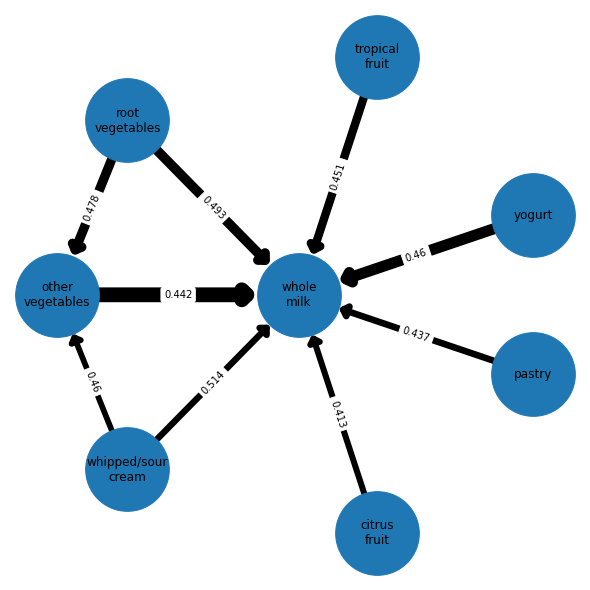

In [236]:
digraph = nx.DiGraph()
for rule in rules_g.itertuples(index=False):
    digraph.add_edge(rule.antecedents, rule.consequents, weight=rule.support, label=round(rule.confidence, 3))

plt.figure(figsize=(8, 8))

pos = {
    list(digraph.nodes())[1]: ( 0.0,  0.0), # whole milk
    list(digraph.nodes())[2]: ( 1.0,  3.0), # tropical fruit
    list(digraph.nodes())[0]: ( 3.0,  1.0), # yogurt
    list(digraph.nodes())[7]: ( 3.0, -1.0), # pastry
    list(digraph.nodes())[4]: ( 1.0, -3.0), # citrus fruit

    list(digraph.nodes())[3]: (-3.1,  0.0), # other vegetables
    list(digraph.nodes())[5]: (-2.2,  2.2), # root vegetables
    list(digraph.nodes())[6]: (-2.2, -2.2), # whipped/sour cream
}

nx.draw(digraph, pos,
    labels={node: ''.join(node).replace(' ', '\n') for node in digraph.nodes()},
    width=[digraph[u][v]['weight']*100 for u,v in digraph.edges()],
    node_size=7000,
    arrowstyle=mpl.patches.ArrowStyle.CurveFilledB(head_length=0.5, head_width=0.5)
)

nx.draw_networkx_edge_labels(digraph, pos, edge_labels=nx.get_edge_attributes(digraph, 'label'))
plt.axis('off')
plt.show()